In [38]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

with open('data2.json','r') as f:
    data = json.loads(f.read())

df = pd.json_normalize(data, meta='title', record_path=['results'])

df['year'] = df['year'].astype(int)
df['income'] = df['income'].astype(int)
df['rating'] = pd.to_numeric(df['rating'])
df['metascore'] = pd.to_numeric(df['metascore'])/10
df = df[['title','year', 'rating', 'metascore', 'income', 'genre']]

In [39]:
df.head()

,title,year,rating,metascore,income,genre
0,The Shawshank Redemption,1994,9.3,8.1,0,Drama
1,The Godfather,1972,9.2,10.0,0,Crime Drama
2,The Dark Knight,2008,9.1,8.4,0,Action Crime Drama
3,The Godfather: Part II,1974,9.0,9.0,0,Crime Drama
4,12 Angry Men,1957,9.0,9.6,0,Crime Drama


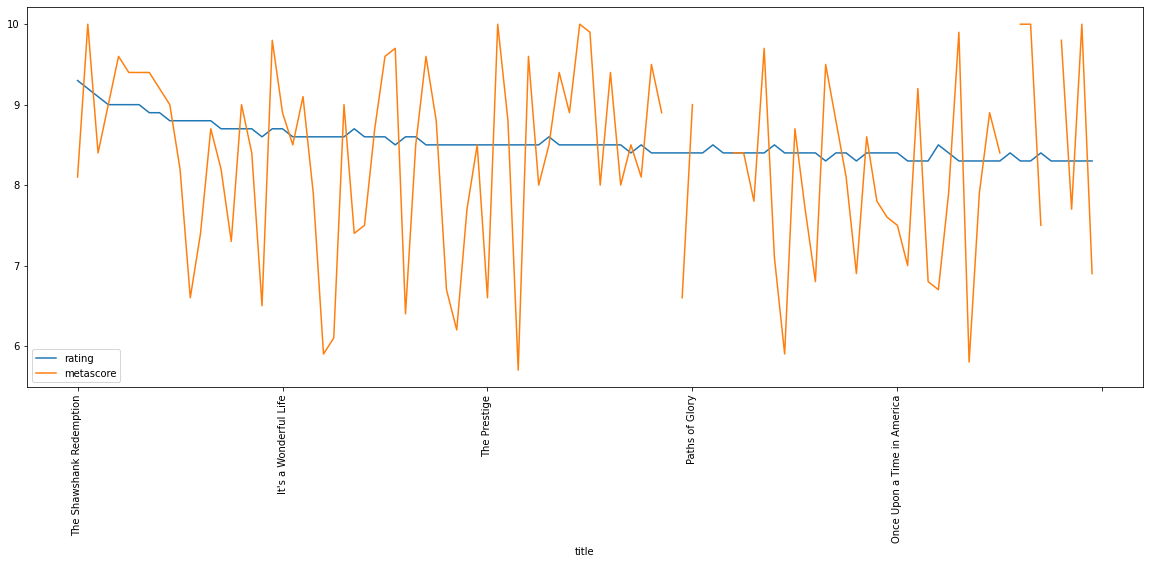

In [41]:
df.plot(x='title', y=['rating', 'metascore'], rot=90, fontsize=10)
plt.show()

<AxesSubplot:xlabel='year'>

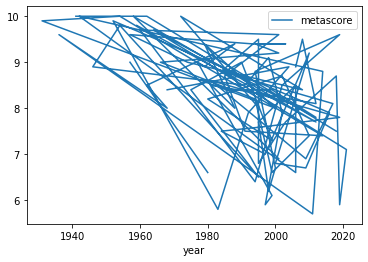

In [31]:
df.plot(x="year", y="metascore", fontsize=10)


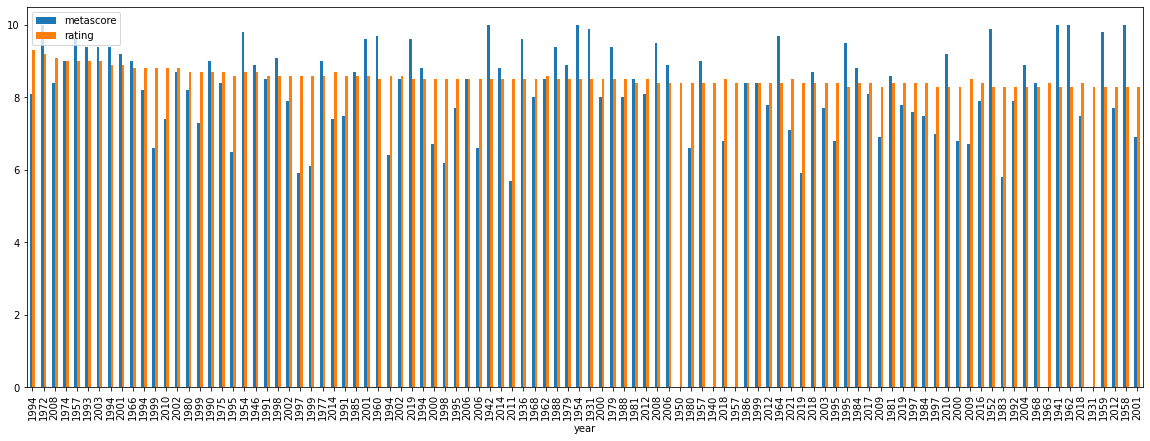

In [40]:
plt.rcParams['figure.figsize'] = [20, 7]

df.plot(x="year", y=["metascore", "rating"], kind="bar")
plt.show()

In [49]:
from pandas import Series

df_dec = df[['genre', 'year', 'metascore', 'rating', 'title']]

s = df['genre'].str.split(' ').apply(Series, 1).stack()
s.index = s.index.droplevel(-1) # to line up with df's index
s.name = 'genre'
del df_dec['genre']
df_dec = df_dec.join(s)
#df_dec.plot(x="genre", y="year", kind="bar", rot=90, fontsize=10)

#df_dec.plot(x="genre", y=["metascore", "rating"], kind="bar")

df_dec = df_dec.groupby(["title", "genre"], sort=True)["year"].count()
print(df_dec)
d2 = df_dec.to_frame(name = 'genre count').reset_index()

print(d2)

title                        genre    
12 Angry Men                 Crime        1
                             Drama        1
2001: A Space Odyssey        Adventure    1
                             Sci-Fi       1
3 Idiots                     Comedy       1
                                         ..
Whiplash                     Drama        1
                             Music        1
Witness for the Prosecution  Crime        1
                             Drama        1
                             Mystery      1
Name: year, Length: 253, dtype: int64
                           title      genre  genre count
0                   12 Angry Men      Crime            1
1                   12 Angry Men      Drama            1
2          2001: A Space Odyssey  Adventure            1
3          2001: A Space Odyssey     Sci-Fi            1
4                       3 Idiots     Comedy            1
..                           ...        ...          ...
248                     Whiplash      Dr

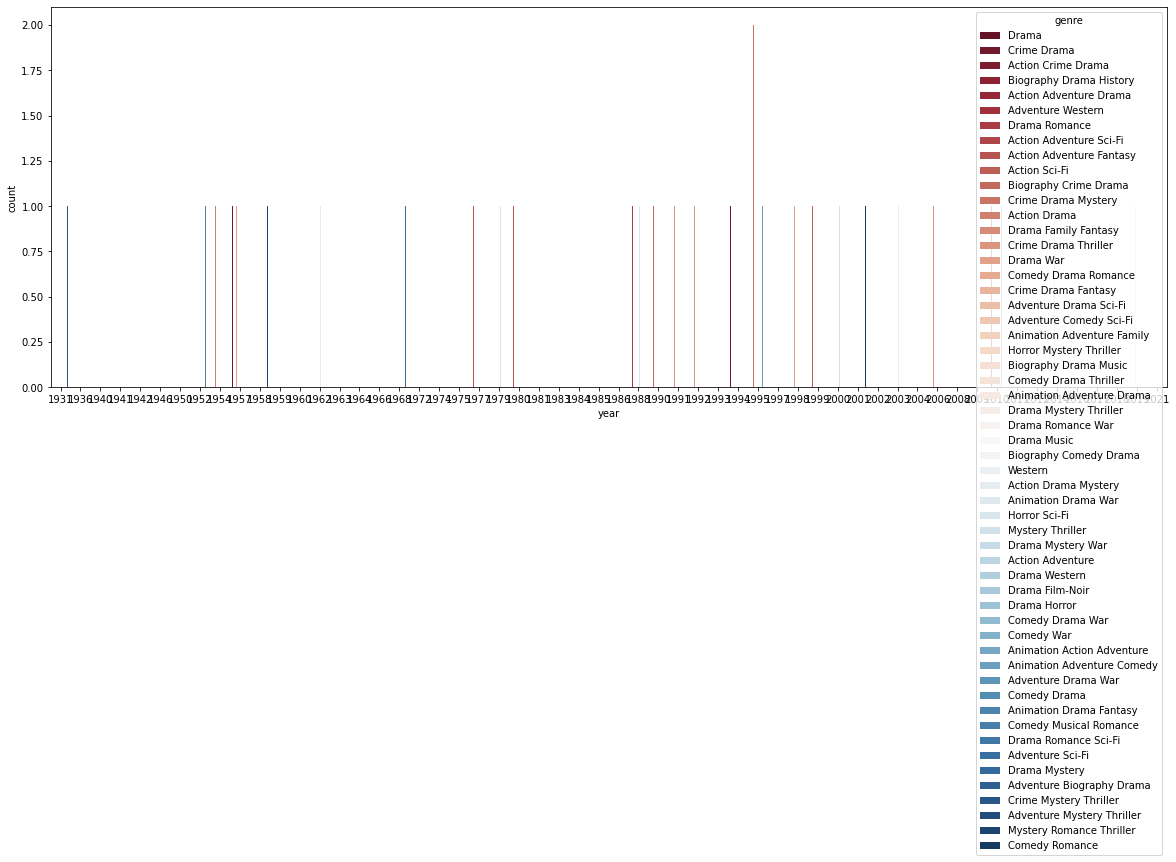

In [52]:
import seaborn as sns

sns.countplot(x='year', hue='genre', data=df, palette='RdBu')
#plt.xticks([0,1], ['No', 'Yes'])
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (100,) and arg 1 with shape (5,).

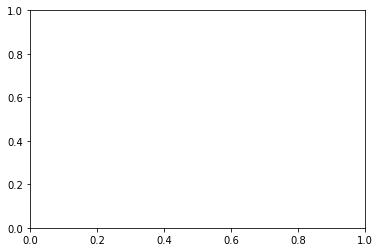

In [34]:
import matplotlib.pyplot as plt
import numpy as np

years = df['year']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(years))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()